# 绘制各类别准确率评估指标柱状图

## 设置Matplotlib中文字体

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [4]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
# !rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体

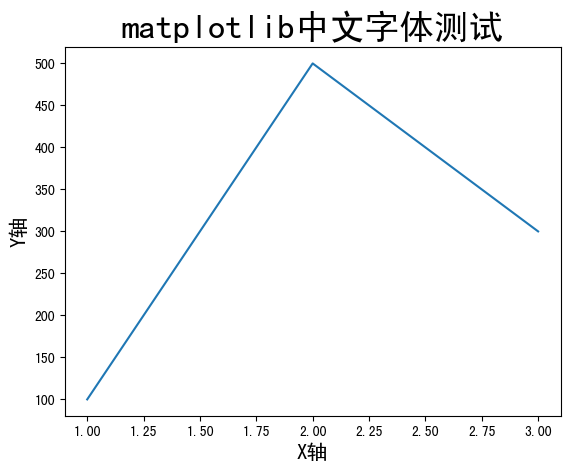

In [5]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 导入工具包

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
fater_path = os.path.abspath('..')
print(fater_path)
os.chdir(fater_path)
import sys
sys.path.append("..")
%matplotlib inline
dataset_name = 'test_easy_classes'
model_path = './models/2023-10-09-01-47_max_epoch_100/'

# 类别名称 和 ID索引号 的映射字典
class_names_dic = {0: 'covering', 1: 'device', 2: 'domestic_animal', 3: 'mater', 4: 'person', 5: 'plant',
                       6: 'structure', 7: 'vertebrate'}
# 获得类别名称
classes = list(class_names_dic.values())
print(classes)

/home/mark/Documents/PythonProject/ShuffleNet-Retrain/ShuffleNetV2+
['covering', 'device', 'domestic_animal', 'mater', 'person', 'plant', 'structure', 'vertebrate']


## 导入各类别准确率评估指标表格

In [7]:
df = pd.read_csv(model_path + dataset_name + '-各类别准确率评估指标.csv')

In [8]:
df

,类别,precision,recall,f1-score,support,accuracy,AP,AUC
0,covering,0.513158,0.342105,0.410526,342.0,0.342105,0.482158,0.903227
1,device,0.745763,0.539216,0.625889,408.0,0.539216,0.672884,0.922557
2,domestic_animal,0.834254,0.953684,0.889980,475.0,0.953684,0.943512,0.992509
3,mater,0.657627,0.810867,0.726252,957.0,0.810867,0.790650,0.933297
4,person,0.823051,0.879710,0.850438,1380.0,0.879710,0.899250,0.961225
5,plant,0.845133,0.757937,0.799163,252.0,0.757937,0.861685,0.986895
6,structure,0.575758,0.475000,0.520548,240.0,0.475000,0.523389,0.913665
7,vertebrate,0.887912,0.739927,0.807193,546.0,0.739927,0.870487,0.955167
8,macro avg,0.735332,0.687306,0.703749,4600.0,0.687306,0.755502,0.946068
9,weighted avg,0.755904,0.758478,0.750908,4600.0,0.758478,0.805057,0.949109


## 选择评估指标

In [9]:
feature = 'precision'
# feature = 'recall'
# feature = 'f1-score'
# feature = 'accuracy'
# feature = 'AP'
# feature = 'AUC'

## 绘制柱状图

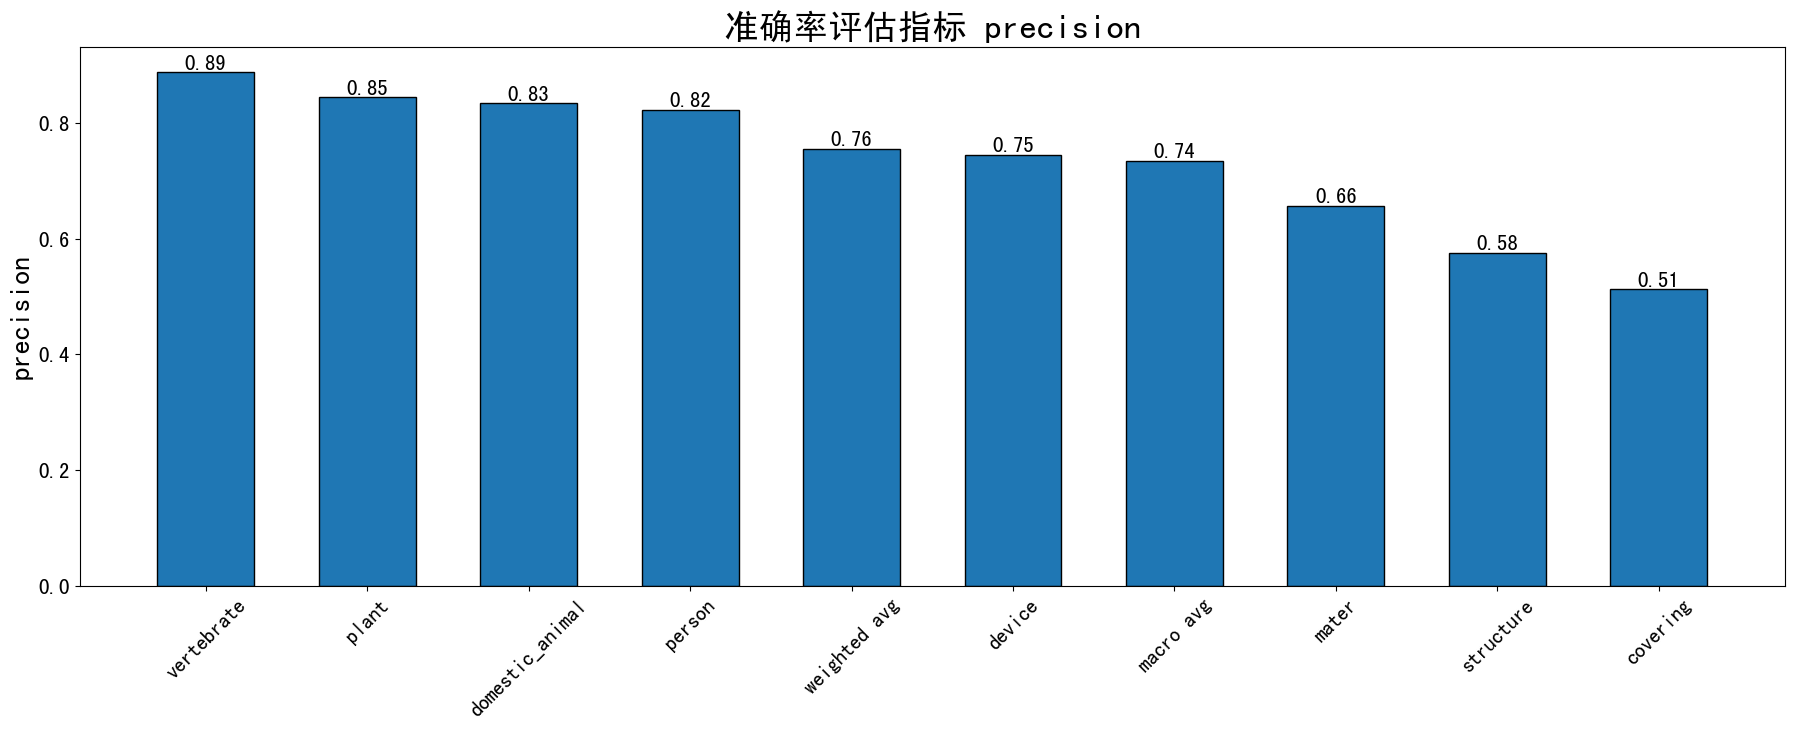

In [10]:
df_plot = df.sort_values(by=feature, ascending=False)

plt.figure(figsize=(22, 7))

x = df_plot['类别']
y = df_plot[feature]

ax = plt.bar(x, y, width=0.6, facecolor='#1f77b4', edgecolor='k')
plt.bar_label(ax, fmt='%.2f', fontsize=15) # 置信度数值

plt.xticks(rotation=45)
plt.tick_params(labelsize=15)
# plt.xlabel('类别', fontsize=20)
plt.ylabel(feature, fontsize=20)
plt.title('准确率评估指标 {}'.format(feature), fontsize=25)

plt.savefig(model_path + dataset_name + '-各类别准确率评估指标柱状图-{}.pdf'.format(feature), dpi=120, bbox_inches='tight')

plt.show()

## 导入工具包

In [11]:
dataset_name = 'test_hard_classes'
model_path = './models/2023-10-09-01-47_max_epoch_100/'

# 类别名称 和 ID索引号 的映射字典
class_names_dic = {0: 'covering', 1: 'device', 2: 'domestic_animal', 3: 'mater', 4: 'person', 5: 'plant',
                       6: 'structure', 7: 'vertebrate'}
# 获得类别名称
classes = list(class_names_dic.values())
print(classes)

['covering', 'device', 'domestic_animal', 'mater', 'person', 'plant', 'structure', 'vertebrate']


## 导入各类别准确率评估指标表格

In [12]:
df = pd.read_csv(model_path + dataset_name + '-各类别准确率评估指标.csv')

In [13]:
df

,类别,precision,recall,f1-score,support,accuracy,AP,AUC
0,covering,0.651376,0.310044,0.420118,229.0,0.310044,0.501214,0.876188
1,device,0.799228,0.405088,0.537662,511.0,0.405088,0.633223,0.795596
2,domestic_animal,0.882759,0.962406,0.920863,266.0,0.962406,0.943113,0.994635
3,mater,0.615196,0.858120,0.716631,585.0,0.858120,0.788336,0.942859
4,person,0.722503,0.902900,0.802691,793.0,0.902900,0.768013,0.932100
5,plant,0.836364,0.750000,0.790831,184.0,0.750000,0.867867,0.987262
6,structure,0.572581,0.518248,0.544061,137.0,0.518248,0.539601,0.940693
7,vertebrate,0.902439,0.752542,0.820702,295.0,0.752542,0.883298,0.960787
8,macro avg,0.747806,0.682419,0.694195,3000.0,0.682419,0.740583,0.928765
9,weighted avg,0.741258,0.727667,0.711274,3000.0,0.727667,0.751207,0.918820


## 选择评估指标

In [14]:
feature = 'precision'
# feature = 'recall'
# feature = 'f1-score'
# feature = 'accuracy'
# feature = 'AP'
# feature = 'AUC'

## 绘制柱状图

In [ ]:
df_plot = df.sort_values(by=feature, ascending=False)

plt.figure(figsize=(22, 7))

x = df_plot['类别']
y = df_plot[feature]

ax = plt.bar(x, y, width=0.6, facecolor='#1f77b4', edgecolor='k')
plt.bar_label(ax, fmt='%.2f', fontsize=15) # 置信度数值

plt.xticks(rotation=45)
plt.tick_params(labelsize=15)
# plt.xlabel('类别', fontsize=20)
plt.ylabel(feature, fontsize=20)
plt.title('准确率评估指标 {}'.format(feature), fontsize=25)

plt.savefig(model_path + dataset_name + '-各类别准确率评估指标柱状图-{}.pdf'.format(feature), dpi=120, bbox_inches='tight')

plt.show()